In [1]:
import pandas as pd
from glob import glob

In [4]:
cnt = pd.DataFrame()
for file in glob('../calibS-1/*.txt'):
  print(file)
  cnt = pd.concat([cnt,pd.read_csv(file,sep=' ', header=None,index_col=0)],axis=1)

../calibS-1/Joints.txt
../calibS-1/GearTorque.txt
../calibS-1/MeasuredPositionsLeica.txt
../calibS-1/MeasuredPositionsTS_Model.txt
../calibS-1/RobotPositions.txt
../calibS-1/DriveTorque.txt


In [11]:
cnt.columns=range(cnt.shape[1])
cnt

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
0,94.429290,-53.369570,67.849075,4.676737,17.413774,-15.608587,0.000000,0.00000,0.0000,0.000000,...,1257.782997,-93.431758,1.529676,176.695513,0.003898,0.054700,0.011997,-0.004777,-0.002837,0.011410
1,91.151010,-52.101610,66.189760,48.378105,27.118320,-67.453530,0.000000,0.00000,0.0000,0.000000,...,1257.630117,-111.705106,0.419940,176.379760,-0.019028,-0.044321,-0.028385,-0.010518,0.000923,-0.017298
2,100.432630,-48.472008,59.058144,-52.297527,44.670227,56.954082,0.000000,0.00000,0.0000,0.000000,...,1258.022590,-56.795023,3.190011,178.263949,0.012725,-0.079608,0.004819,-0.009465,-0.006079,-0.009087
3,94.012840,-23.638317,6.143470,4.788668,91.820900,-16.738571,0.000000,0.00000,0.0000,0.000000,...,1257.803445,-100.632358,43.634065,175.310833,0.016779,0.017424,0.016787,-0.008514,-0.006572,0.010218
4,94.148890,-49.696484,88.087010,177.040050,57.309727,-188.652970,0.000000,0.00000,0.0000,0.000000,...,1257.542306,-93.468308,-49.139862,174.807088,-0.014005,0.021922,-0.021295,0.000226,-0.008891,0.011471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,117.175705,-59.779903,79.798630,-50.830210,18.732674,45.713800,63.593830,430.05590,-3398.1540,-281.328430,...,1228.093930,-98.760830,0.602824,178.536476,0.234641,-1.610079,11.831888,1.083975,0.181235,-0.071973
137,115.867810,-49.201378,54.996130,-14.165884,57.914726,18.896187,-201.595750,455.70108,-2695.3164,17.449604,...,1228.183461,-88.123909,30.195346,178.486122,-0.744513,-1.705536,9.381756,-0.065240,0.433556,-0.182495
138,121.332405,-58.264240,89.268166,-121.737330,39.902344,119.729770,-492.210240,383.26523,-2325.7795,-61.595394,...,1228.140355,-86.785652,-24.321984,178.561696,-1.841692,-1.438289,8.074601,0.228589,-0.118709,0.732410


In [12]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    cnt,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (98, 36)
Test shape: (42, 36)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_df.loc[:,0:30], train_df.loc[:,31:])  # y_train имеет форму (n_samples, 3)

LinearRegression()

In [14]:
predictions = model.predict(test_df.loc[:,0:30])

In [15]:
test_df.loc[:,:].head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
108,61.806920,-53.104763,62.363480,9.456014,62.495102,-37.666634,187.07207,316.40353,-2521.4710,-62.423813,...,1188.704536,-82.892005,39.363703,178.567493,0.693030,-1.184996,8.768266,0.238716,0.518605,0.341370
67,128.384100,-41.006990,59.314450,-2.492036,67.046580,24.707090,0.00000,0.00000,0.0000,0.000000,...,811.591971,-90.666548,54.479548,179.173165,-0.021012,-0.061592,-0.021535,-0.009224,0.000468,-0.012845
31,80.176704,-41.278110,91.722790,166.641190,42.064120,-179.440020,0.00000,0.00000,0.0000,0.000000,...,635.926350,-85.183716,-21.082574,173.201796,-0.009484,0.026438,0.021700,-0.007998,-0.005395,0.010140
119,105.344990,-78.129930,111.939130,-85.528810,10.253825,81.599320,828.07970,-1536.53980,-2413.3242,-88.328210,...,1086.994272,-90.639317,3.660024,177.254659,3.043804,5.744670,8.396720,0.336079,-1.172295,-0.731475
42,114.573320,-40.498665,33.105347,-25.976200,48.153755,20.032925,0.00000,0.00000,0.0000,0.000000,...,1513.490501,-89.278699,4.944868,178.392713,-0.004936,0.048920,0.018865,0.001289,-0.002646,-0.017048


In [19]:
predictions[0]

array([-1.12071395,  8.779839  ,  0.24285621,  0.52462337,  0.34424726])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
mean_absolute_error(test_df.loc[:,31:],predictions)

0.016089339189822263

In [18]:
mean_squared_error(test_df.loc[:,31:],predictions)

0.0008875615190960358

In [20]:
r2_score(test_df.loc[:,31:],predictions)

0.9994563476539996

In [ ]:
corr_matrix = cnt.corr()

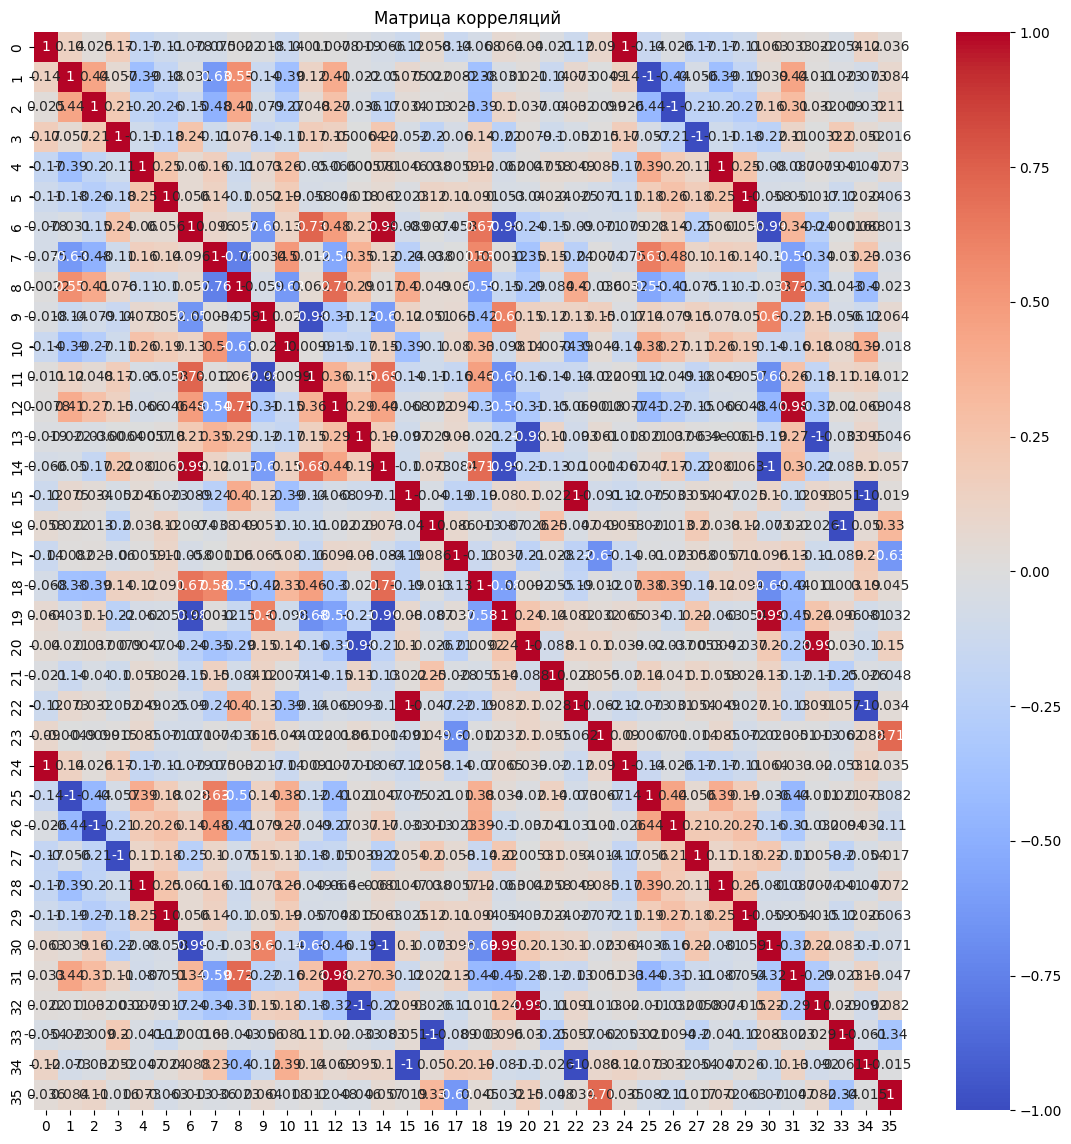

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

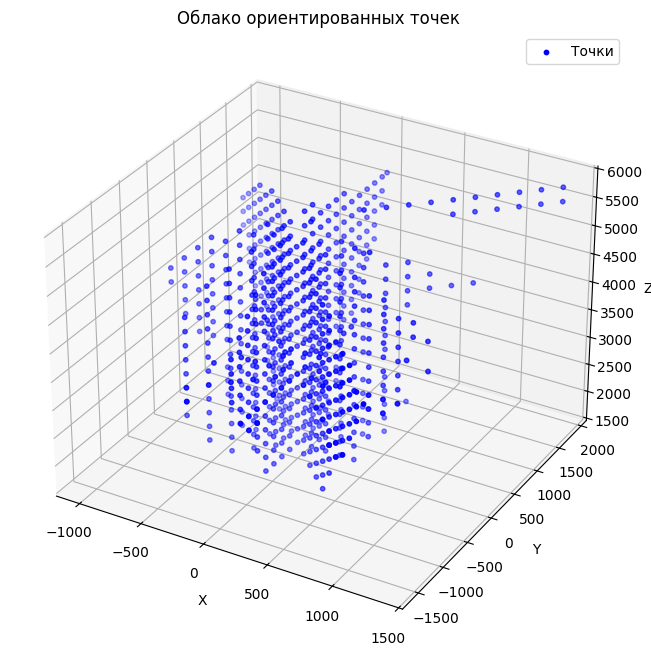

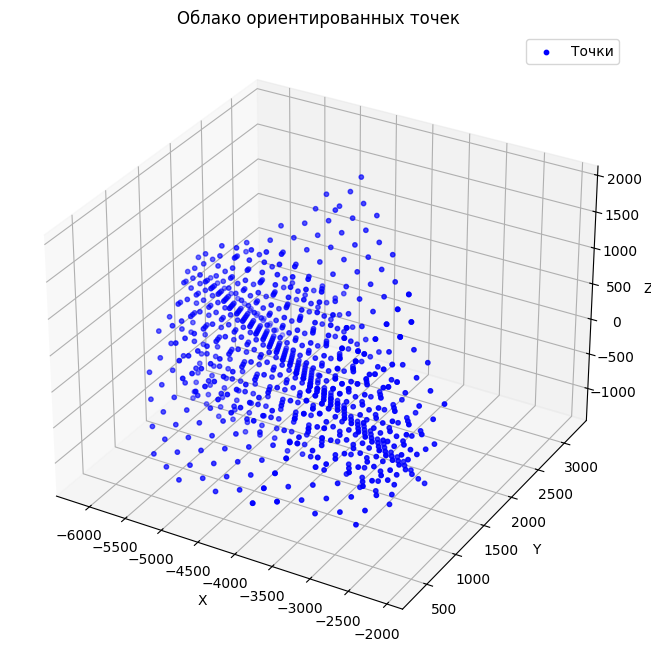

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_points(filename):
    """Загрузка данных из файла с обработкой BOM и разделителей"""
    # Читаем файл как текст, удаляем BOM, затем загружаем в numpy
    with open(filename, 'r', encoding='utf-8-sig') as f:  # utf-8-sig удаляет BOM
        data = np.loadtxt(f, delimiter=None)  # None - автоматическое определение разделителя
    
    positions = data[:, 1:4]  # X, Y, Z
    orientations = data[:, 4:7]  # RZ, RY, RX
    return positions, orientations

def visualize_points(positions, orientations, scale=0.1):
    """Визуализация точек с ориентацией"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Отображаем точки
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', s=10, label='Точки')
    
    # Отображаем ориентацию (векторы)
    for pos, ori in zip(positions, orientations):
        # Преобразуем углы Эйлера в вектор направления
        # (упрощенное представление - можно использовать матрицы поворота для точности)
        rx, ry, rz = ori
        dx = np.cos(rz) * np.cos(ry) * scale
        dy = np.sin(rz) * np.cos(ry) * scale
        dz = np.sin(ry) * scale
        
        ax.quiver(pos[0], pos[1], pos[2], dx, dy, dz, color='r', length=scale, normalize=True)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Облако ориентированных точек')
    ax.legend()
    plt.show()

# Пример использования
if __name__ == "__main__":
    # Замените 'your_file.txt' на путь к вашему файлу
    positions, orientations = load_points('../data/collect800Points100-20-110/RobotPositions.txt')
    # visualize_points(positions, orientations)


    mesured_positions, mesured_orientations = load_points('../data/collect800Points100-20-110/MeasuredPositionsLeica.txt')
    # visualize_points(mesured_positions, mesured_orientations)
